# ***TensorFlow***

- Anushka Panda
- Laksmi Pravallika
- Shreyasi Mandal

In [ ]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
tfds.disable_progress_bar()

In [ ]:
def plotter(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)
train_ds, test_ds = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOXXHRI/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOXXHRI/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOXXHRI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
buffer_size = 10000
batch_size = 64
train_ds = train_ds.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [ ]:
vocab_size = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = vocab_size)
encoder.adapt(train_ds.map(lambda text, label: text))

In [ ]:
model = tf.keras.Sequential([
       encoder,
       tf.keras.layers.Embedding(input_dim = len(encoder.get_vocabulary()),output_dim = 64, mask_zero = True),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
       tf.keras.layers.Dense(64, activation = 'relu'),
       tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(1e-4),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_ds, epochs = 6,validation_data = test_ds, validation_steps = 30 )

Epoch 1/3
391/391 [==============================] - 701s 2s/step - loss: 0.3343 - accuracy: 0.8514 - val_loss: 0.3346 - val_accuracy: 0.8562
Epoch 2/3
391/391 [==============================] - 696s 2s/step - loss: 0.3184 - accuracy: 0.8598 - val_loss: 0.3290 - val_accuracy: 0.8594
Epoch 3/3
391/391 [==============================] - 697s 2s/step - loss: 0.3146 - accuracy: 0.8640 - val_loss: 0.3373 - val_accuracy: 0.8443


I put in less epochs because they were taking lot of time to train

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print('Loss:- ',test_loss)
print('Accuracy:- ',test_accuracy)

391/391 [==============================] - 150s 383ms/step - loss: 0.3289 - accuracy: 0.8424
Loss:-  0.3289196491241455
Accuracy:-  0.8424000144004822


(0.0, 0.3384241312742233)

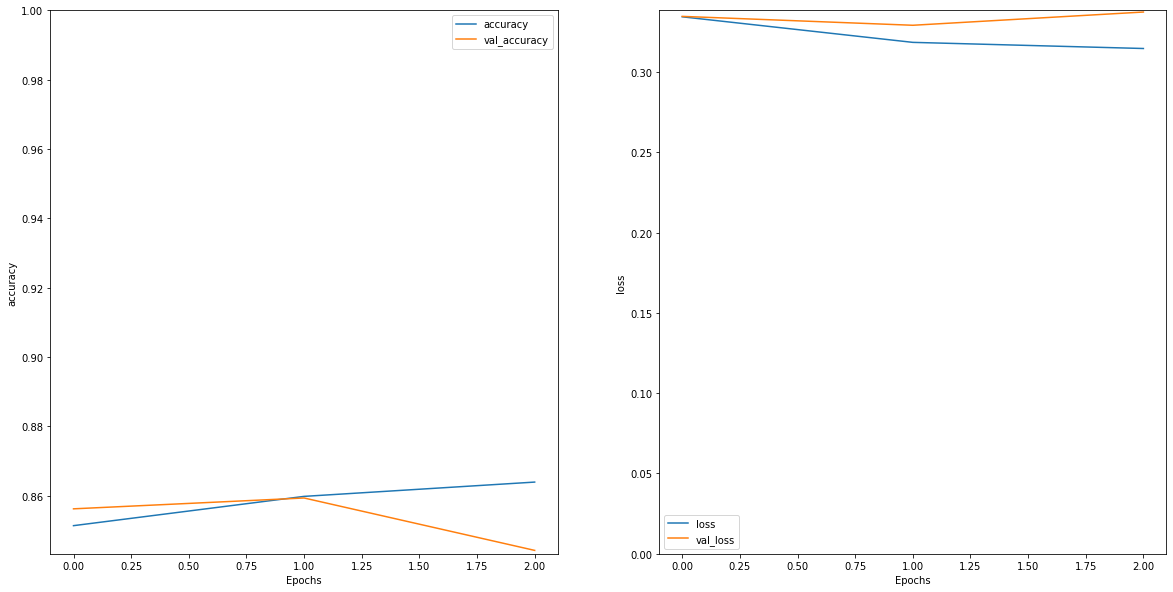

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plotter(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plotter(history, 'loss')
plt.ylim(0,None)